# CIV 1498 Project 2

In [1]:


import pandas as pd
import re
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
import geopy.distance
from matplotlib import ticker
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import MonthLocator, DateFormatter 


# Import Data

In [2]:
df= pd.read_csv('trips_with_coordinates.csv')

In [3]:
df.head()

,Start Time,End Time,Trip Duration,Start Station Name,End Station Name,User Type,Start_Lat,Start_Lon,End_Lat,End_Lon,Distance,day,month,year,hour,count,dow
0,2017-01-01 00:03:00-05:00,2017-01-01 00:08:00-05:00,274,Bay St / College St (East Side),Bay St / Albert St,Member,43.660439,-79.385525,43.653264,-79.382458,834.691066,1,1,2017,0,1,1
1,2017-01-05 18:06:00-05:00,2017-01-05 18:11:00-05:00,252,Bay St / College St (East Side),Bay St / Albert St,Member,43.660439,-79.385525,43.653264,-79.382458,834.691066,5,1,2017,18,1,0
2,2017-01-06 18:46:00-05:00,2017-01-06 18:50:00-05:00,241,Bay St / College St (East Side),Bay St / Albert St,Member,43.660439,-79.385525,43.653264,-79.382458,834.691066,6,1,2017,18,1,0
3,2017-01-09 19:17:00-05:00,2017-01-09 19:21:00-05:00,262,Bay St / College St (East Side),Bay St / Albert St,Member,43.660439,-79.385525,43.653264,-79.382458,834.691066,9,1,2017,19,1,0
4,2017-01-10 17:37:00-05:00,2017-01-10 17:42:00-05:00,285,Bay St / College St (East Side),Bay St / Albert St,Member,43.660439,-79.385525,43.653264,-79.382458,834.691066,10,1,2017,17,1,0


add distance

In [8]:
def calc_distance(lat_from, lon_from, lat_to, lon_to):
    coords_1 = (lat_from, lon_from)
    coords_2 = (lat_to, lon_to)
    distance = geopy.distance.distance(coords_1, coords_2).m
    
    return distance

In [ ]:
df['Distance'] = df.apply(lambda x: calc_distance(x['Start_Lat'],x['Start_Lon'],x['End_Lat'],x['End_Lon']),axis=1)

In [4]:
df.count()

Start Time            10173316
End Time              10173316
Trip Duration         10173316
Start Station Name    10173316
End Station Name      10173316
User Type             10173316
Start_Lat             10173316
Start_Lon             10173316
End_Lat               10173316
End_Lon               10173316
Distance              10173316
day                   10173316
month                 10173316
year                  10173316
hour                  10173316
count                 10173316
dow                   10173316
dtype: int64

missing 2020 11,12

Add day month year day hour count

In [5]:
# data clean for analysis 

# 0 for weekday and 1 for weekend

def dow(starttime): 
    
    if starttime.weekday() < 5:
        return 0
    else:
        return 1

In [6]:
df["Start Time"] = pd.to_datetime(df["Start Time"])
df['day'] = df['Start Time'].dt.day
df['month']=df['Start Time'].dt.month
df['year']= df['Start Time'].dt.year
df['hour'] =df['Start Time'].dt.hour
df['count'] = 1
df['dow'] = df['Start Time'].apply(dow)

KeyboardInterrupt: 

In [9]:
df.to_csv('trips_with_coordinates_final.csv', index=False)

In [7]:
df_2021 = df[df['year']==2021]
df_2020 = df[df['year']==2020]
df_2019 = df[df['year']==2019]

In [8]:
df1=pd.concat([df_2019,df_2020]) #2019 -2020
df2=pd.concat([df_2020,df_2021]) #2020 -2021
df3=pd.concat([df_2019,df_2020,df_2021]) #2019 -2021

# Total ride counts by year by day 

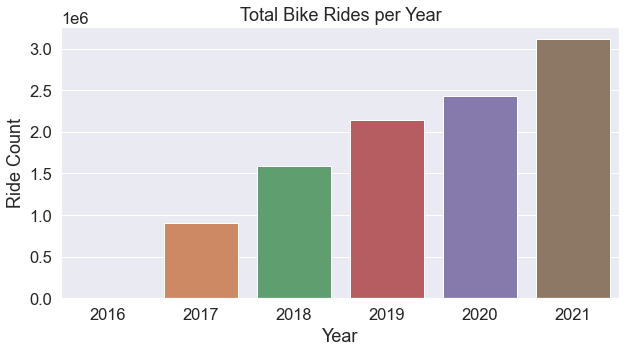

In [17]:
#Set Up Plot 
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
#plot the graph for daily trip count for all, casual and annual members
ax = sns.countplot(data=df,x='year', )
ax.axes.set_title("Total Bike Rides per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Ride Count")
plt.show()

In [13]:
# Pivot function
def pivot_df(df, index, columns, values, scale, aggfunc=np.sum,cumsum=False):
    df_pivot = df.pivot_table(index=index, columns=columns, values=values, aggfunc=aggfunc)
    df_pivot = df_pivot.apply(lambda x: round((x * scale),2), axis=1)
    if cumsum == True:
        df_pivot = df_pivot.cumsum()
    return df_pivot

Total count by customer type

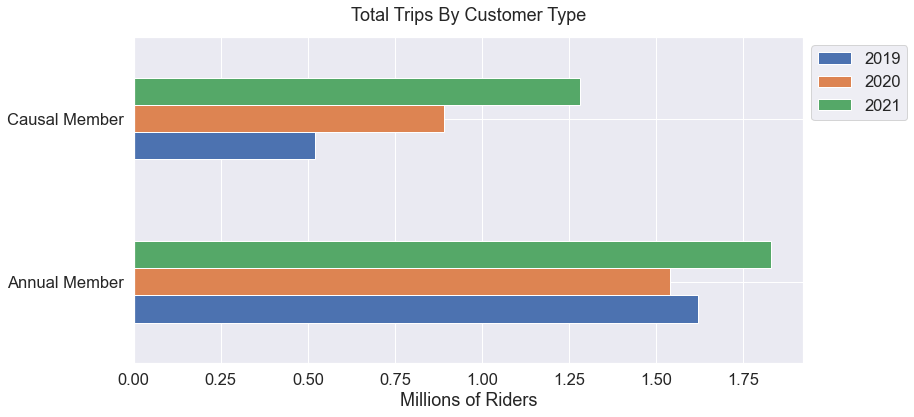

In [14]:
pv_df = pivot_df(df3, ['User Type'], ['year'], 'count', 0.000001)
labels = ['2019', '2020','2021']

pv_df.plot(kind='barh', figsize=(12, 6))
plt.xlabel('Millions of Riders')
plt.ylabel(None)
plt.yticks([0, 1], labels=['Annual Member', 'Causal Member'])

plt.title("Total Trips By Customer Type", fontsize=18, pad=16)
plt.legend(labels, title=None, loc='upper left', bbox_to_anchor=(1, 1))

Total count by weekend or weekday

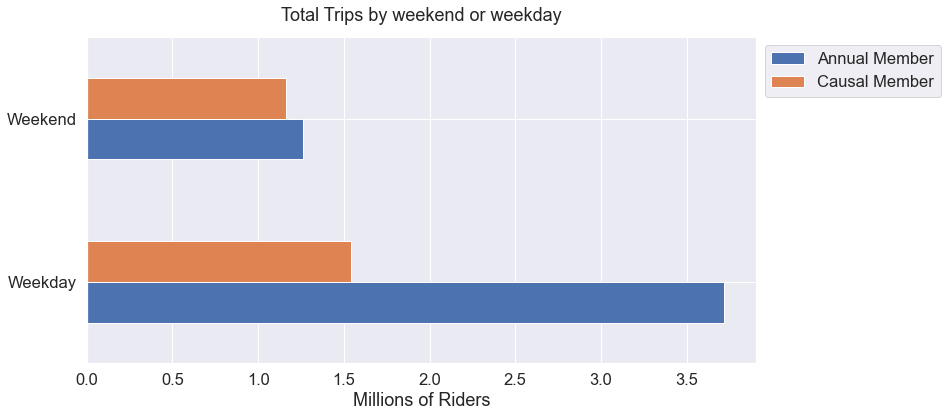

In [15]:
pv_df = pivot_df(df3, ['dow'], ['User Type'], 'count', 0.000001)

labels = ['Annual Member', 'Causal Member']

pv_df.plot(kind='barh', figsize=(12, 6))
plt.xlabel('Millions of Riders')
plt.ylabel(None)
plt.yticks([0, 1], labels=['Weekday','Weekend'])

plt.title("Total Trips by weekend or weekday",fontsize=18, pad=16)
plt.legend(labels, title=None, loc='upper left', bbox_to_anchor=(1, 1))

2019-2021 tendency 

In [20]:
df_group= df3.groupby(pd.Grouper(key="Start Time",freq='D')).agg(trip_count=('Start Station Name',"count"),
                                                                 annual_members=('User Type',lambda x: (x == 'Annual Member').sum()),
                                                                 casual_members=('User Type',lambda x: (x == 'Casual Member').sum()))

# df3 is the datasource 
df_group['year']=df_group.index.year
df_group['doy']=df_group.index.dayofyear
df_group['day']=df_group.index.day
df_group['month']=df_group.index.month
import calendar
df_group['month']=df_group['month'].apply(lambda x: calendar.month_abbr[x])
df_group['dow'] = df_group.index.dayofweek
df_group.head()

,trip_count,annual_members,casual_members,year,doy,day,month,dow
Start Time,,,,,,,,
2019-01-01 00:00:00-05:00,943,793,150,2019,1,1,Jan,1
2019-01-02 00:00:00-05:00,2039,1963,76,2019,2,2,Jan,2
2019-01-03 00:00:00-05:00,2041,1991,50,2019,3,3,Jan,3
2019-01-04 00:00:00-05:00,2949,2802,147,2019,4,4,Jan,4
2019-01-05 00:00:00-05:00,1951,1745,206,2019,5,5,Jan,5


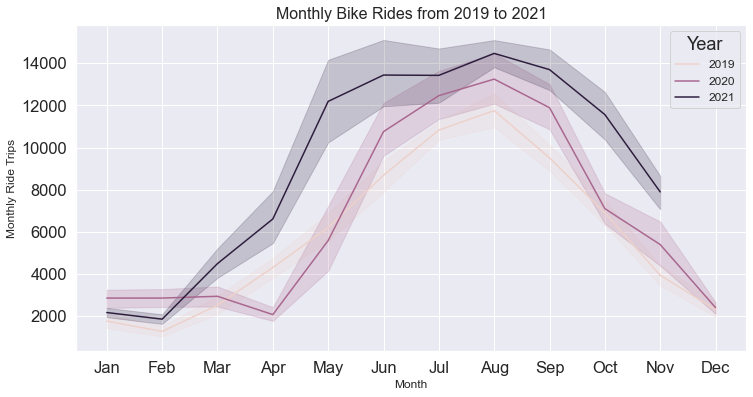

In [21]:

plt.figure(figsize=(12,6))

ax=sns.lineplot(data=df_group, x="month", y="trip_count", hue="year")

ax.axes.set_title("Monthly Bike Rides from 2019 to 2021",fontsize=16)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax.set_ylabel("Monthly Ride Trips",fontsize=12)
ax.set_xlabel("Month",fontsize=12)
ax.legend(title="Year",fontsize=12)
plt.show()

## how does a pandemic affect the number of bike share in toronto?

## 2019 , 2020 and 2021

total number of bike rentals and average rentals per day?

In [23]:
df_pivot_month1 = pivot_df(df3, ['month'], ['year'],'count',0.000001)
df_pivot_avg_day1 = pivot_df(df3, ['month', 'day'], ['year'], 'count', 1) # avg rental count per month
df_pivot_avg_day1 = df_pivot_avg_day1.pivot_table(index=['month'], values=[2019, 2020, 2021], aggfunc=np.mean)

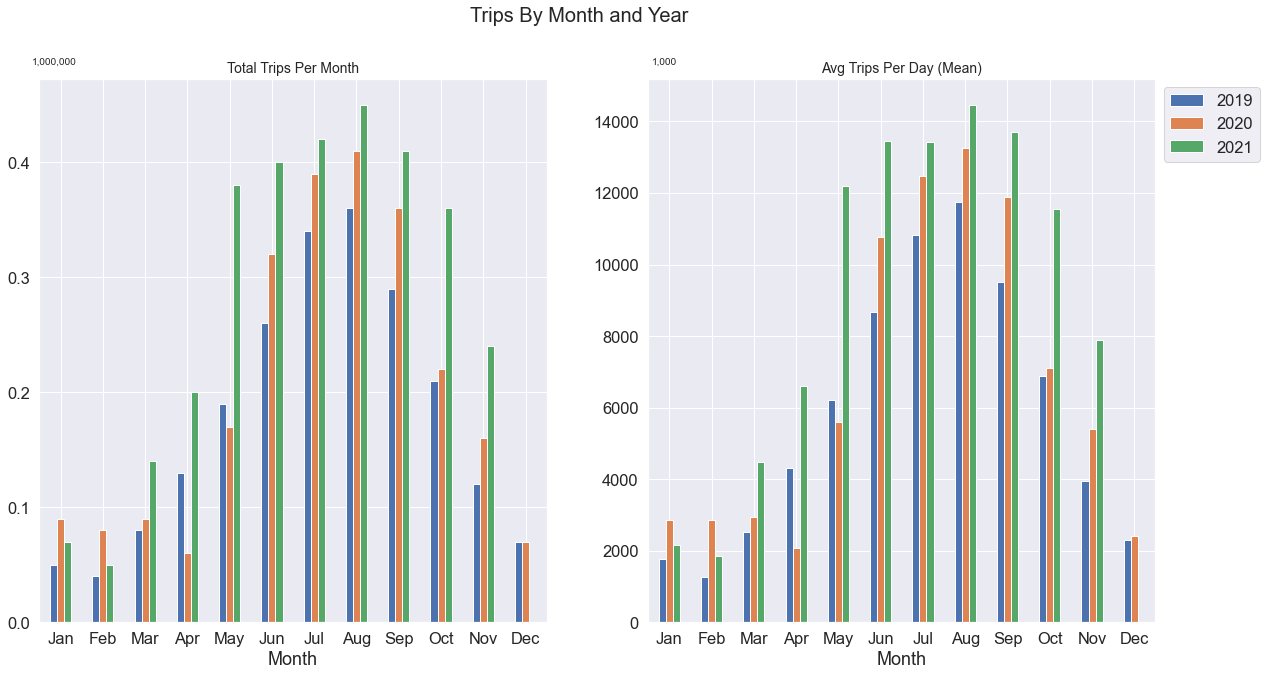

In [28]:
# Plot the results
df_pivot_month1.rename(index={1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',
                          11:'Nov',12:'Dec'}, inplace=True)
df_pivot_avg_day1.rename(index={1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',
                          11:'Nov',12:'Dec'}, inplace=True)

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(121)
df_pivot_month1.plot(kind='bar', rot=0, ax=ax1, legend=False)
ax1.set_xlabel('Month')
ax1.set_title('Total Trips Per Month', fontsize=14)
ax2 = fig.add_subplot(122)
df_pivot_avg_day1.plot(kind='bar', rot=0, ax=ax2)
ax2.set_xlabel('Month')
ax2.set_title('Avg Trips Per Day (Mean)',fontsize=14)

plt.suptitle('Trips By Month and Year', fontsize=20)
plt.text(0.12, 0.9, '1,000,000', fontsize=10, transform=plt.gcf().transFigure)
plt.text(0.55, 0.9, '1,000', fontsize=10, transform=plt.gcf().transFigure)
plt.legend(title=None, loc='upper left', bbox_to_anchor=(1, 1))

total cumulative rental counts, by day to see if we can detect the point that rental numbers started dropping off.

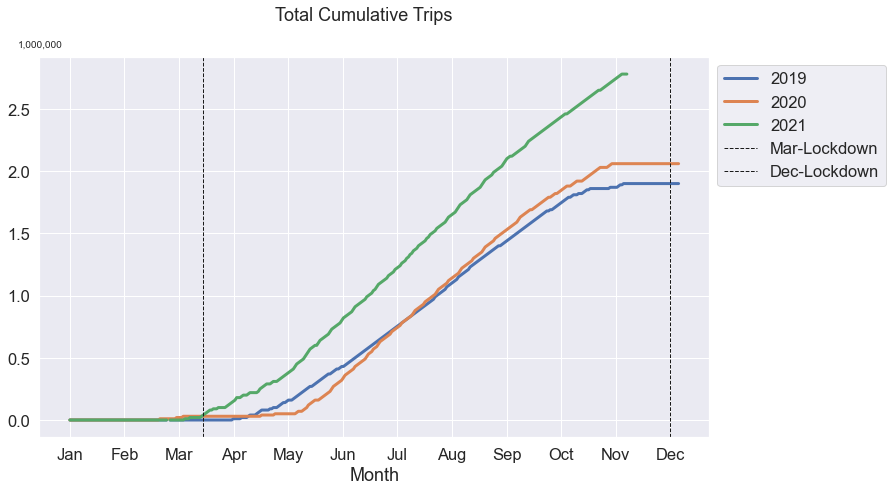

In [25]:
df_pivot = pivot_df(df3, ['month', 'day'], ['year'], 'count', 0.000001 ,cumsum=True)
df_pivot.plot(kind='line', linewidth=3, figsize=(12, 7))

#lockdown label
plt.axvline(x=80, color='k', linestyle='--', linewidth=1, label="Mar-Lockdown")
plt.axvline(x=360, color='k', linestyle='--', linewidth=1, label="Dec-Lockdown")

plt.text(0.1,0.9, '1,000,000', fontsize=10, transform=plt.gcf().transFigure)
plt.suptitle("Total Cumulative Trips", fontsize=18)
plt.xticks(np.linspace(0, 360, num=12),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.legend(title=None, loc='upper left', bbox_to_anchor=(1, 1))

advantage
People have more time
many businesses shut down,gyms temporarily closed,bikes is a good way to do workout

disadvantage
No travel client

effect on rental durations?

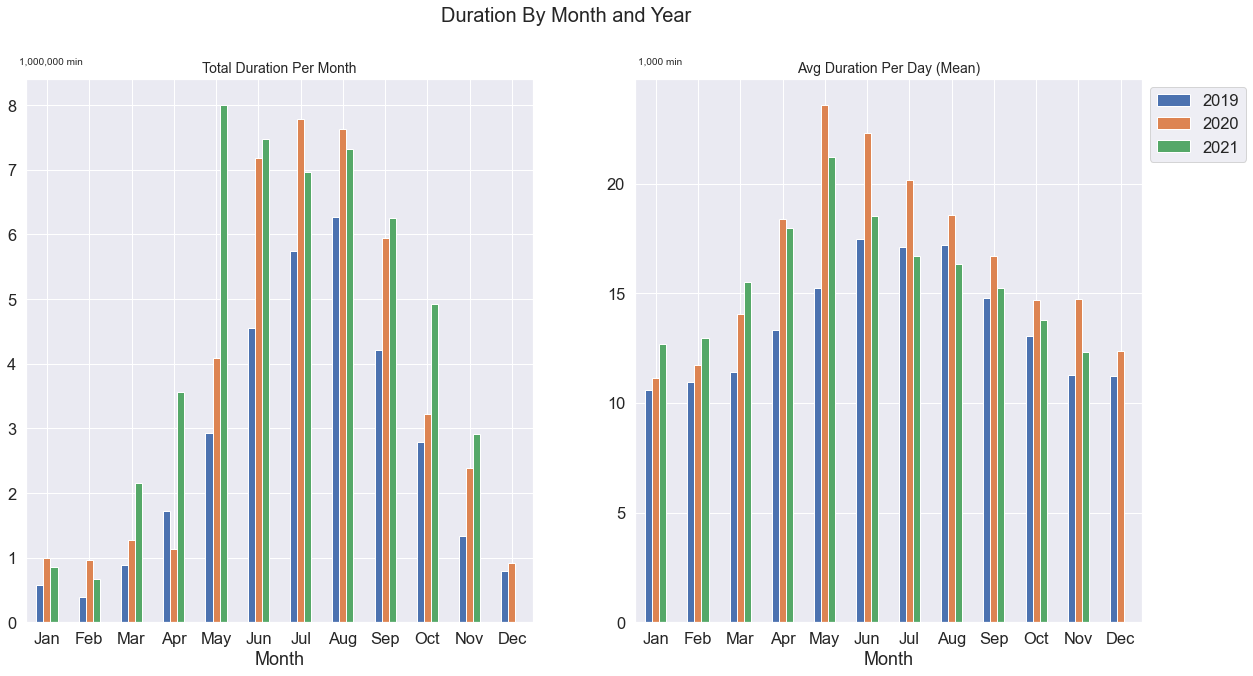

In [29]:
df_pivot_dur_mon1 = pivot_df(df3, ['month'], ['year'], 'Trip Duration',0.000001/60)
df_pivot_dur_day1 = pivot_df(df3, ['month'], ['year'], 'Trip Duration', 1/60, aggfunc=np.mean)

# Plot the results
df_pivot_dur_mon1.rename(index={1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',
                          11:'Nov',12:'Dec'}, inplace=True)
df_pivot_dur_day1.rename(index={1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',
                          11:'Nov',12:'Dec'}, inplace=True)

fig = plt.figure(figsize=(20, 10)) # change
ax1 = fig.add_subplot(121)
df_pivot_dur_mon1.plot(kind='bar', rot=0, ax=ax1, legend=False)
ax1.set_xlabel('Month')
ax1.set_title('Total Duration Per Month', fontsize=14)
ax2 = fig.add_subplot(122)
df_pivot_dur_day1.plot(kind='bar', rot=0, ax=ax2) # change
ax2.set_xlabel('Month')
ax2.set_title('Avg Duration Per Day (Mean)',fontsize=14)

plt.suptitle('Duration By Month and Year', fontsize=20)
plt.text(0.12, 0.9, '1,000,000 min', fontsize=10, transform=plt.gcf().transFigure)
plt.text(0.55, 0.9, '1,000 min', fontsize=10, transform=plt.gcf().transFigure)
plt.legend(title=None, loc='upper left', bbox_to_anchor=(1, 1))

effect on rental distance?

## Rider behavior in terms of rides by hour of day or day of the week?

Rider reduce at peak commute hours (6-9 AM) and (4-7 PM)
Increase at non-peak commute hours

In [27]:
df_pivot_19 = pivot_df(df_2019, ['month', 'day', 'dow', 'hour'], ['year'], 'count', 1)
df_pivot_19 = pivot_df(df_pivot_19, ['month', 'dow', 'hour'], columns=None, values=[2019],
                       scale=1, aggfunc=np.mean)
df_pivot_20 = pivot_df(df_2020, ['month', 'day', 'dow', 'hour'], ['year'], 'count', 1)
df_pivot_20= pivot_df(df_pivot_20, ['month', 'dow', 'hour'], columns=None, values=[2020],
                       scale=1, aggfunc=np.mean)
df_pivot_21 = pivot_df(df_2021, ['month', 'day', 'dow', 'hour'], ['year'], 'count', 1)
df_pivot_21= pivot_df(df_pivot_21, ['month', 'dow', 'hour'], columns=None, values=[2021],
                       scale=1, aggfunc=np.mean)

In [30]:
def make_subplots(df, x_labels, y_labels, y_min, y_max, title):
    
    x = [i for i in range(24)] 

    fig, ax = plt.subplots(2,12, sharey='row', figsize=(24,10)) 
    fig.tight_layout(h_pad=2, w_pad=1)
    
    # Create subplots
    for i in range(2):
        for j in range(12):
            
            # Extract values for 2019 to 2021 
            y1 = [df[0][df[0].index.isin([(j+1,i,n)])].iloc[0,0] for n in range(24)]
            y2 = [df[1][df[1].index.isin([(j+1,i,n)])].iloc[0,0] for n in range(24)]
            if j==11:
                y3 = [0]*24
            else:
                y3 = [df[2][df[2].index.isin([(j+1,i,n)])].iloc[0,0] for n in range(24)]
            
            y = [y1, y2, y3]
            labels = ['2019', '2020','2021']
            colors = ['blue','red', 'green']

            # Plot the values
            ax_loc = ax[i,j]
            for y_arr, label, color in zip(y, labels, colors):
               
                ax_loc.plot(x, y_arr, color=color, label=label, linewidth=1)


            ax_loc.set_xticks(np.linspace(0, 24, 5))
            ax_loc.set_ylim(y_min, y_max)
            ax_loc.set_xticklabels(['12am', '6am', '12pm', '6pm',''], rotation=45, fontsize=10)

         
            
            if j == 0: #y labels 
                ax_loc.set_ylabel(y_labels[i], labelpad=16)            
            if i == 1: # xlabels
                ax_loc.set_xlabel(x_labels[j], labelpad=16)

        
        ax[0,2].set_title(title, x=0.5, fontsize=18, pad=24)
        ax[0,11].legend(title=None, loc='upper left', bbox_to_anchor=(1, 1));

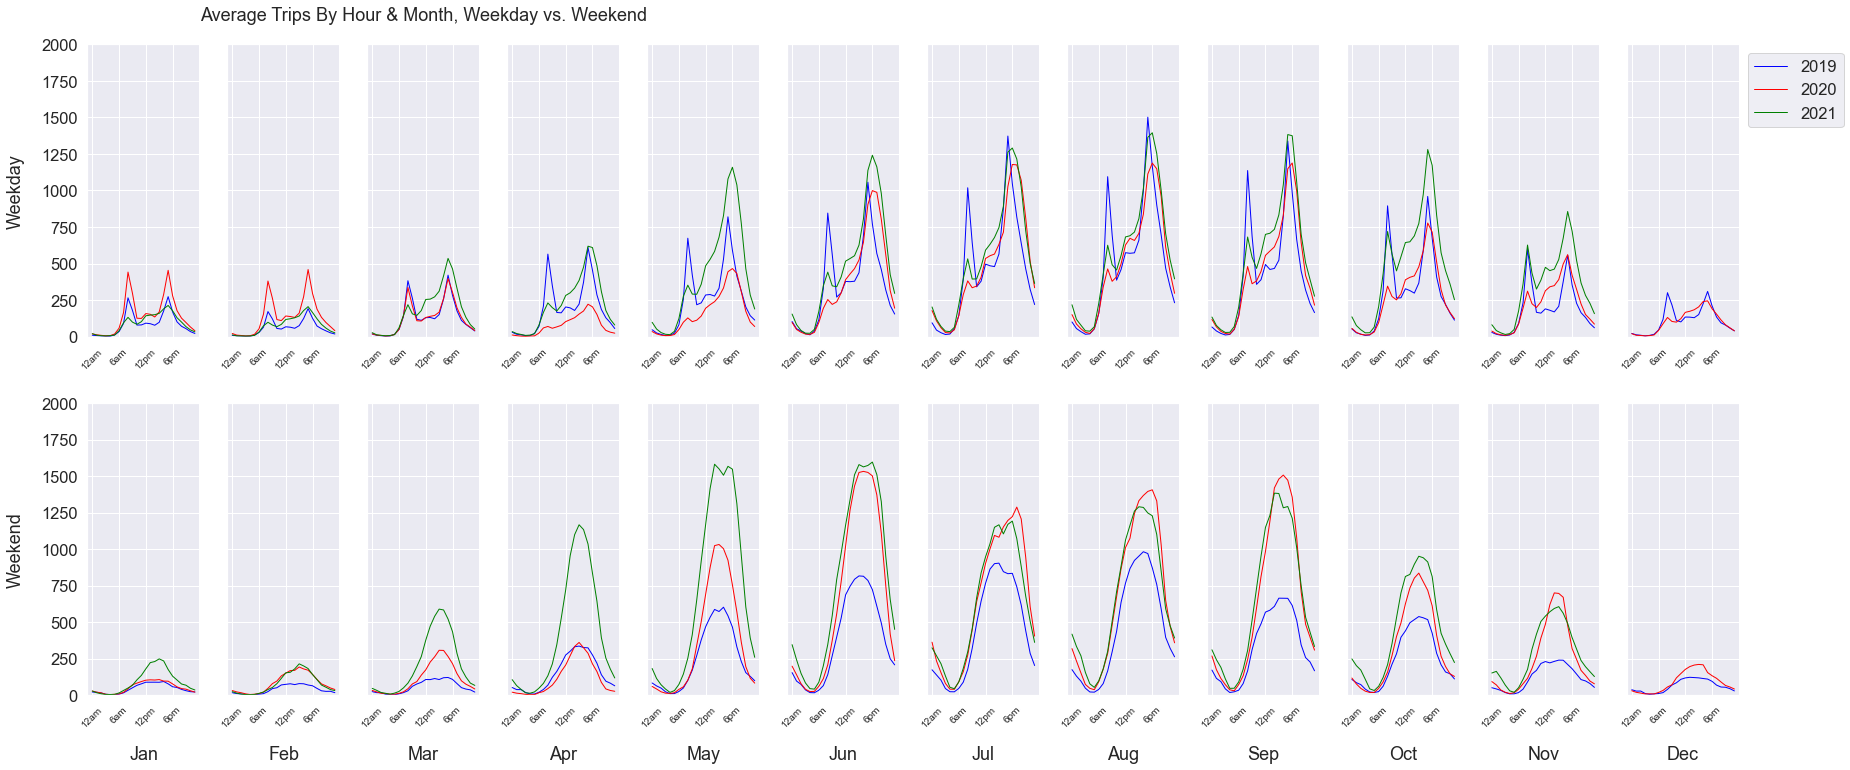

In [31]:

dfs = [df_pivot_19, df_pivot_20,df_pivot_21]
x_labels = ['Jan', 'Feb', 'Mar','Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y_labels = ['Weekday', 'Weekend']
y_min, y_max = 0, 2000
title = "Average Trips By Hour & Month, Weekday vs. Weekend"

#fun
make_subplots(dfs, x_labels, y_labels, y_min, y_max, title)


# Different year duration and distance by causal member and annual member，Covid-19 impacted the bike trip duration and distance?

2019

In [31]:
# REMOVE OUTELIER 
Q1 = df_2019['Trip Duration'].quantile(0.25)
Q3 = df_2019['Trip Duration'].quantile(0.75)
IQR = Q3 - Q1
df_2019= df_2019[(df_2019['Trip Duration'] >= Q1 - 1.5 * IQR) & (df_2019['Trip Duration'] <= Q3 + 1.5 * IQR)]

C:\Users\Wang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Wang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Wang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

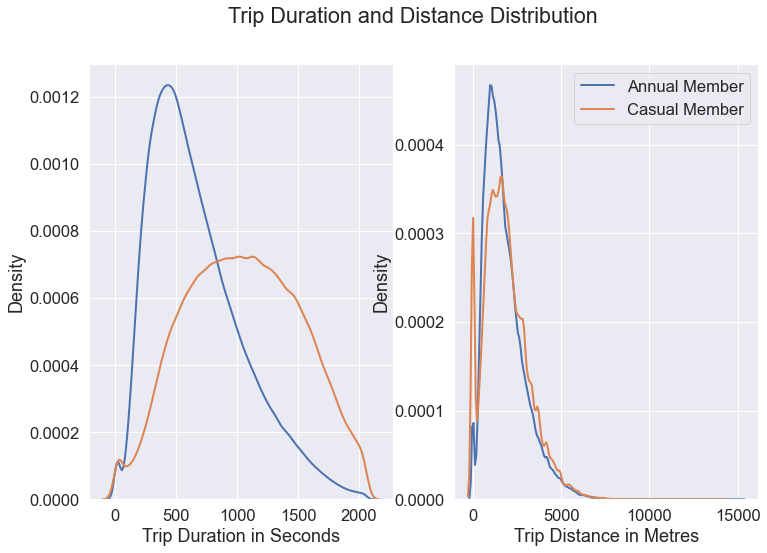

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
#Plotting Distributon Plots for Each User type
for i, col in enumerate(['Trip Duration', 'Distance']):
    for j, user in enumerate(df_2019['User Type'].unique()):
        sns.distplot(df_2019[df_2019['User Type'] == user][col], hist = False, ax = ax[i], label = user, 
                     kde_kws = dict(linewidth = 2))

plt.suptitle('Trip Duration and Distance Distribution')
ax[0].set_xlabel('Trip Duration in Seconds')
ax[1].set_xlabel('Trip Distance in Metres')
plt.legend()

2020

C:\Users\Wang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Wang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Wang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

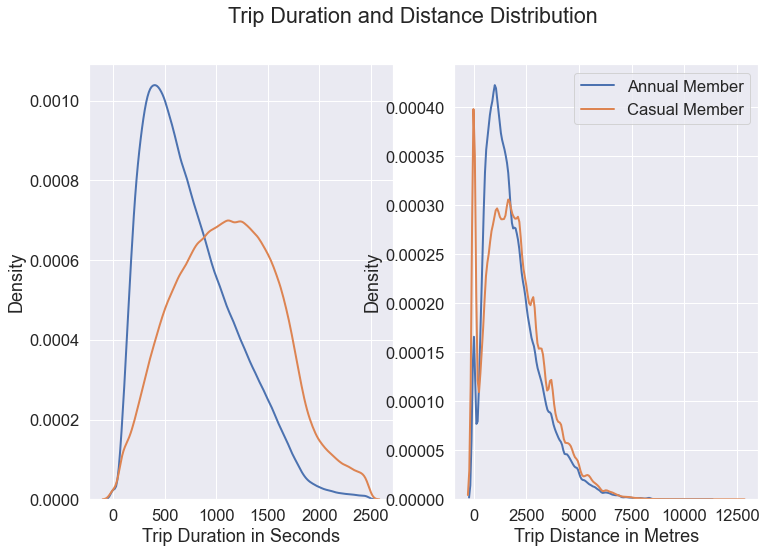

In [33]:
Q1 = df_2020['Trip Duration'].quantile(0.25)
Q3 = df_2020['Trip Duration'].quantile(0.75)
IQR = Q3 - Q1
df_2020= df_2020[(df_2020['Trip Duration'] >= Q1 - 1.5 * IQR) & (df_2020['Trip Duration'] <= Q3 + 1.5 * IQR)]

fig, ax = plt.subplots(1, 2, figsize = (12, 8))
#Plotting Distributon Plots for Each User type
for i, col in enumerate(['Trip Duration', 'Distance']):
    for j, user in enumerate(df_2020['User Type'].unique()):
        sns.distplot(df_2020[df_2020['User Type'] == user][col], hist = False, ax = ax[i], label = user, 
                     kde_kws = dict(linewidth = 2))

plt.suptitle('Trip Duration and Distance Distribution')
ax[0].set_xlabel('Trip Duration in Seconds')
ax[1].set_xlabel('Trip Distance in Metres')
plt.legend()

2021

C:\Users\Wang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Wang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Wang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

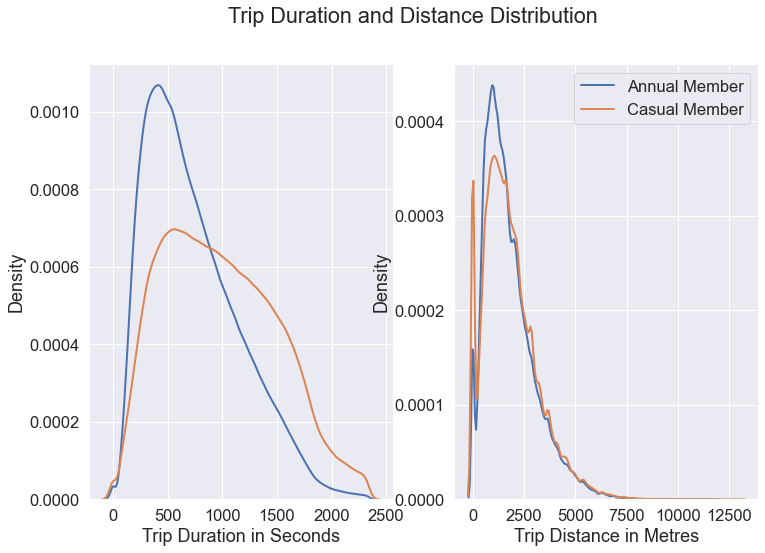

In [34]:
Q1 = df_2021['Trip Duration'].quantile(0.25)
Q3 = df_2021['Trip Duration'].quantile(0.75)
IQR = Q3 - Q1
df_2021= df_2021[(df_2021['Trip Duration'] >= Q1 - 1.5 * IQR) & (df_2021['Trip Duration'] <= Q3 + 1.5 * IQR)]

fig, ax = plt.subplots(1, 2, figsize = (12, 8))
#Plotting Distributon Plots for Each User type
for i, col in enumerate(['Trip Duration', 'Distance']):
    for j, user in enumerate(df_2021['User Type'].unique()):
        sns.distplot(df_2021[df_2021['User Type'] == user][col], hist = False, ax = ax[i], label = user, 
                     kde_kws = dict(linewidth = 2))

plt.suptitle('Trip Duration and Distance Distribution')
ax[0].set_xlabel('Trip Duration in Seconds')
ax[1].set_xlabel('Trip Distance in Metres')
plt.legend()

In [35]:
df_dur=df3.groupby(['year','User Type']).agg(Mean_Trip_Dur=('Trip Duration',"mean"),
                                            Median_Trip_Dur=('Trip Duration',"median"))
df_dur['Mean_Trip_Dur']=df_dur['Mean_Trip_Dur']/60
df_dur['Median_Trip_Dur']=df_dur['Median_Trip_Dur']/60
df_dur

Mean_Trip_Dur  Median_Trip_Dur
year User Type                                    
2019 Annual Member      11.530503         9.950000
     Casual Member      26.106842        19.183333
2020 Annual Member      12.979123        11.150000
     Casual Member      26.412636        19.833333
2021 Annual Member      12.699646        10.900000
     Casual Member      21.768234        16.683333

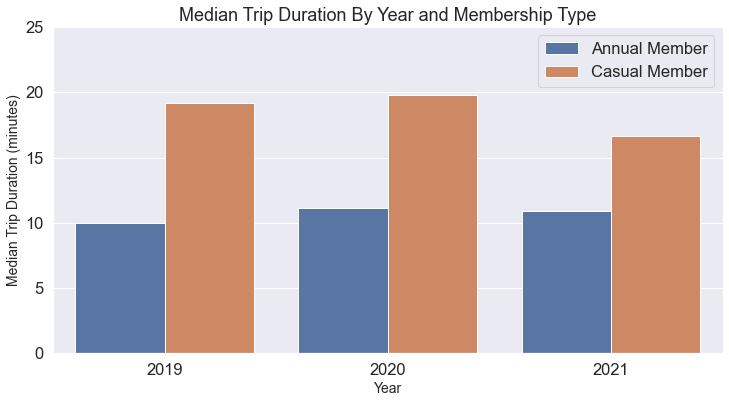

In [36]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=df3['year'], y=df3['Trip Duration']/60, hue=df3['User Type'], ci=None, estimator=np.median)



ax.axes.set_title("Median Trip Duration By Year and Membership Type")
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Median Trip Duration (minutes)", fontsize=14)
plt.ylim(0,25)
ax.legend()

plt.show()

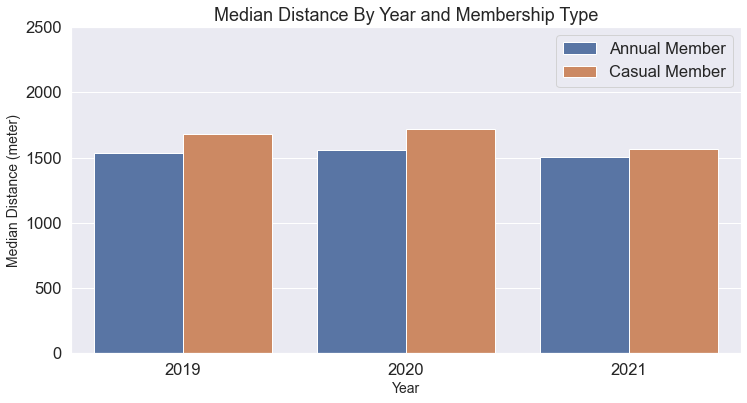

In [37]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=df3['year'], y=df3['Distance'], hue=df3['User Type'], ci=None, estimator=np.median)


ax.axes.set_title("Median Distance By Year and Membership Type")
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Median Distance (meter)", fontsize=14)
ax.legend()
plt.ylim(0,2500)

plt.show()